In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Student Mental health.csv  


In [57]:
import pandas as pd
students_mental = pd.read_csv('Student Mental health.csv')
students_mental.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [58]:
students_mental.duplicated().sum()

0

In [59]:
students_mental['Age'] = students_mental['Age'].fillna(students_mental['Age'].mean())

In [60]:
students_mental.columns = students_mental.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?','')

In [61]:
import pandas as pd
students_mental['age'] = students_mental['age'].astype(int)

In [62]:
students_mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   timestamp                                    101 non-null    object
 1   choose_your_gender                           101 non-null    object
 2   age                                          101 non-null    int64 
 3   what_is_your_course                          101 non-null    object
 4   your_current_year_of_study                   101 non-null    object
 5   what_is_your_cgpa                            101 non-null    object
 6   marital_status                               101 non-null    object
 7   do_you_have_depression                       101 non-null    object
 8   do_you_have_anxiety                          101 non-null    object
 9   do_you_have_panic_attack                     101 non-null    object
 10  did_you_seek_a

In [23]:
# students_mental['choose_your_gender'] = students_mental['choose_your_gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-23-3d956c5be379>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students_mental['choose_your_gender'] = students_mental['choose_your_gender'].replace({'Male': 0, 'Female': 1})


In [64]:
students_mental['your_current_year_of_study'] = students_mental['your_current_year_of_study'].replace({'year 1': 1, 'Year 1': 1, 'year 2':2, 'Year 2':2, 'year 3':3,'Year 3':3,'year 4':4})

In [65]:
students_mental['what_is_your_cgpa'] = students_mental['what_is_your_cgpa'].replace({'3.50 - 4.00 ': '3.50 - 4.00'})

In [66]:
print(students_mental['what_is_your_cgpa'].unique())

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [67]:
students_mental.head()

,timestamp,choose_your_gender,age,what_is_your_course,your_current_year_of_study,what_is_your_cgpa,marital_status,do_you_have_depression,do_you_have_anxiety,do_you_have_panic_attack,did_you_seek_any_specialist_for_a_treatment
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


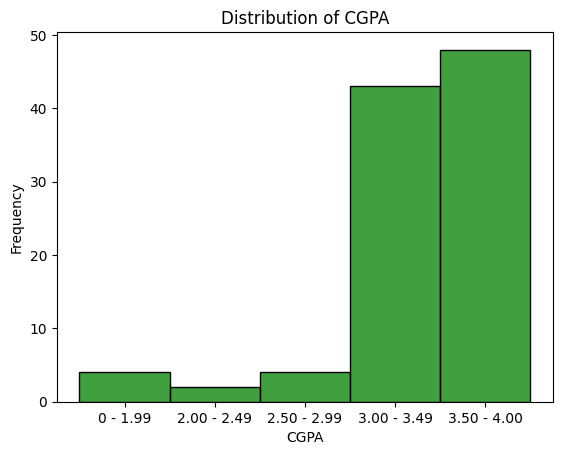

In [68]:
# Exercise 1 : Visualizing the Distribution of CGPA
import seaborn as sns
import matplotlib.pyplot as plt

cgpa_sorted = students_mental.sort_values(by='what_is_your_cgpa')
sns.histplot(cgpa_sorted['what_is_your_cgpa'], color = 'green')

plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


<ipython-input-76-1c049e252f33>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anxiety_by_gender.index, y=anxiety_by_gender.values, palette='RdBu')


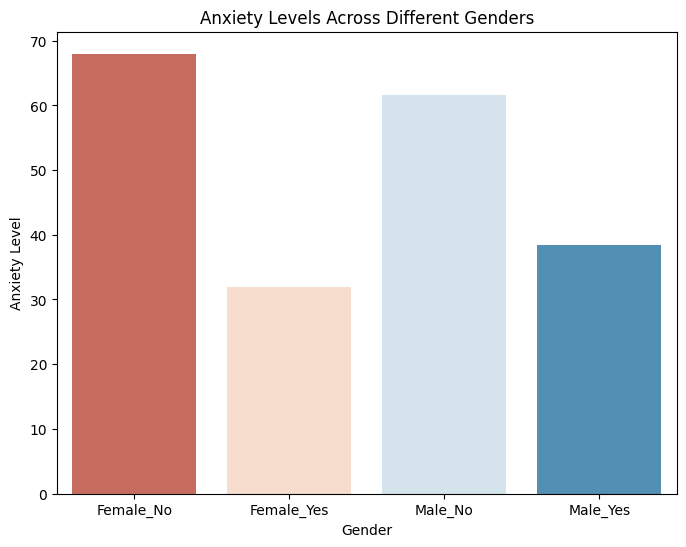

In [76]:
#  Exercise 2: Comparing Anxiety Levels Across Different Genders
import seaborn as sns
import matplotlib.pyplot as plt

anxiety_by_gender = students_mental.groupby('choose_your_gender')['do_you_have_anxiety'].value_counts(normalize=True) * 100
anxiety_by_gender.index = ['_'.join(map(str, idx)) for idx in anxiety_by_gender.index]
plt.figure(figsize=(8, 6))
sns.barplot(x=anxiety_by_gender.index, y=anxiety_by_gender.values, palette='RdBu')

plt.title('Anxiety Levels Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Anxiety Level')
plt.show()

In [79]:
students_mental['do_you_have_panic_attack'] = students_mental['do_you_have_panic_attack'].replace({'No': 0, 'Yes': 1})

<ipython-input-79-124bcfdfd762>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students_mental['do_you_have_panic_attack'] = students_mental['do_you_have_panic_attack'].replace({'No': 0, 'Yes': 1})


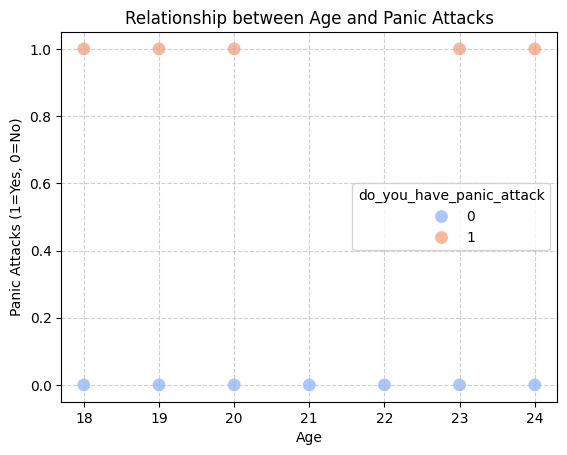

In [86]:
#  Exercise 3: Exploring the Relationship Between Age and Panic Attacks
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(y='do_you_have_panic_attack', x='age', data=students_mental, hue='do_you_have_panic_attack', palette='coolwarm', s=100)
plt.xlabel('Age')
plt.ylabel('Panic Attacks (1=Yes, 0=No)')
plt.title('Relationship between Age and Panic Attacks')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [87]:
students_mental['do_you_have_depression'] = students_mental['do_you_have_depression'].replace({'No': 0, 'Yes': 1})

<ipython-input-87-e32e8e0d95fd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students_mental['do_you_have_depression'] = students_mental['do_you_have_depression'].replace({'No': 0, 'Yes': 1})


In [88]:
students_mental['do_you_have_anxiety'] = students_mental['do_you_have_anxiety'].replace({'No': 0, 'Yes': 1})

<ipython-input-88-204cedd97e96>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students_mental['do_you_have_anxiety'] = students_mental['do_you_have_anxiety'].replace({'No': 0, 'Yes': 1})


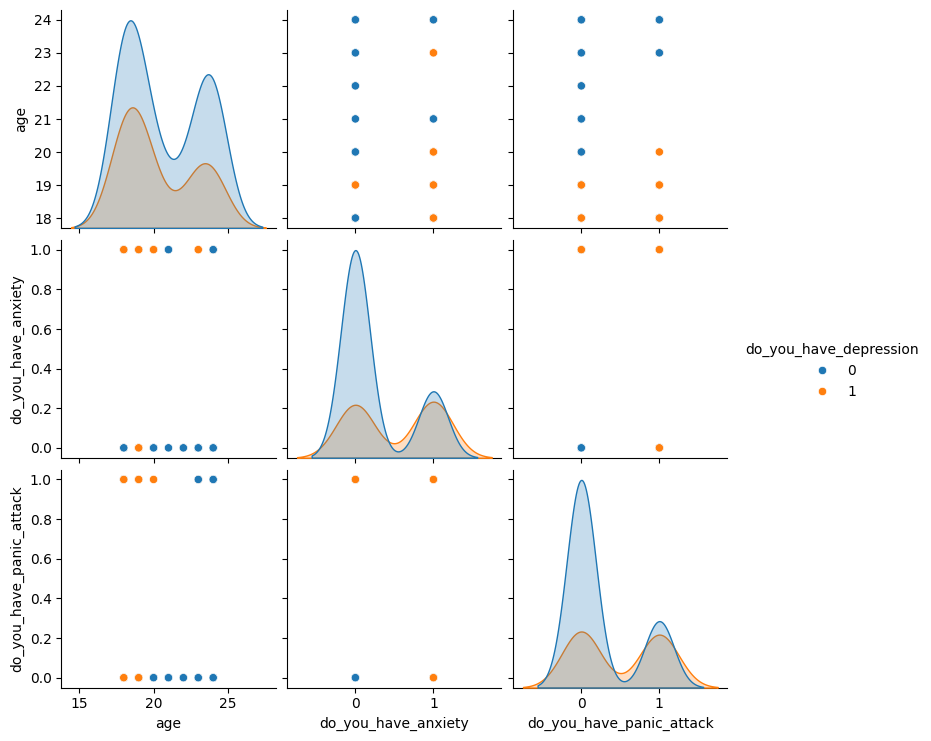

In [97]:
# Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['age', 'what_is_your_cgpa', 'do_you_have_depression', 'do_you_have_anxiety', 'do_you_have_panic_attack']
mental_subset = students_mental[selected_columns]
sns.pairplot(mental_subset, hue='do_you_have_depression', palette='tab10')
plt.show()

In [99]:
students_mental['what_is_your_cgpa'] = students_mental['what_is_your_cgpa'].str.extract(r'(\d\.\d{2})').astype(float)

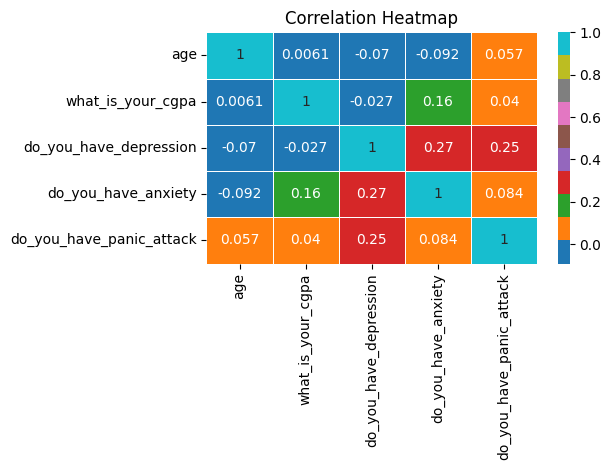

In [108]:
# Exercise 5: Creating a Heatmap to Visualize Correlations
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = students_mental[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='tab10', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

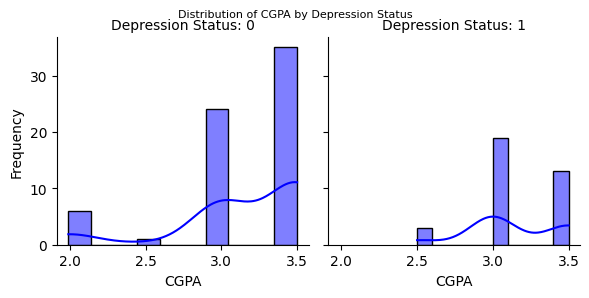

In [119]:
#  Exercise 6: Analyzing Distributions and Relationships Using FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt

distributions = sns.FacetGrid(students_mental, col='do_you_have_depression', palette = 'tab10' )
distributions.map(sns.histplot, 'what_is_your_cgpa', kde = True, bins = 10, color = 'blue')
distributions.set_titles("Depression Status: {col_name}", fontsize=4)
distributions.set_axis_labels("CGPA", "Frequency")
distributions.fig.suptitle("Distribution of CGPA by Depression Status", fontsize=8)
plt.show()